In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-flower-dataset/IRIS.csv


<h3>Imports</h3>

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
path = "/kaggle/input/iris-flower-dataset/IRIS.csv"
df = pd.read_csv(path)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
X=df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [13]:
y = df['species']

In [14]:
print(f'''
    Dependent Variables Shape: {X.shape}
    Target Variable Shape: {y.shape}
''')


    Dependent Variables Shape: (150, 4)
    Target Variable Shape: (150,)



<h3>Pair Plot</h3>

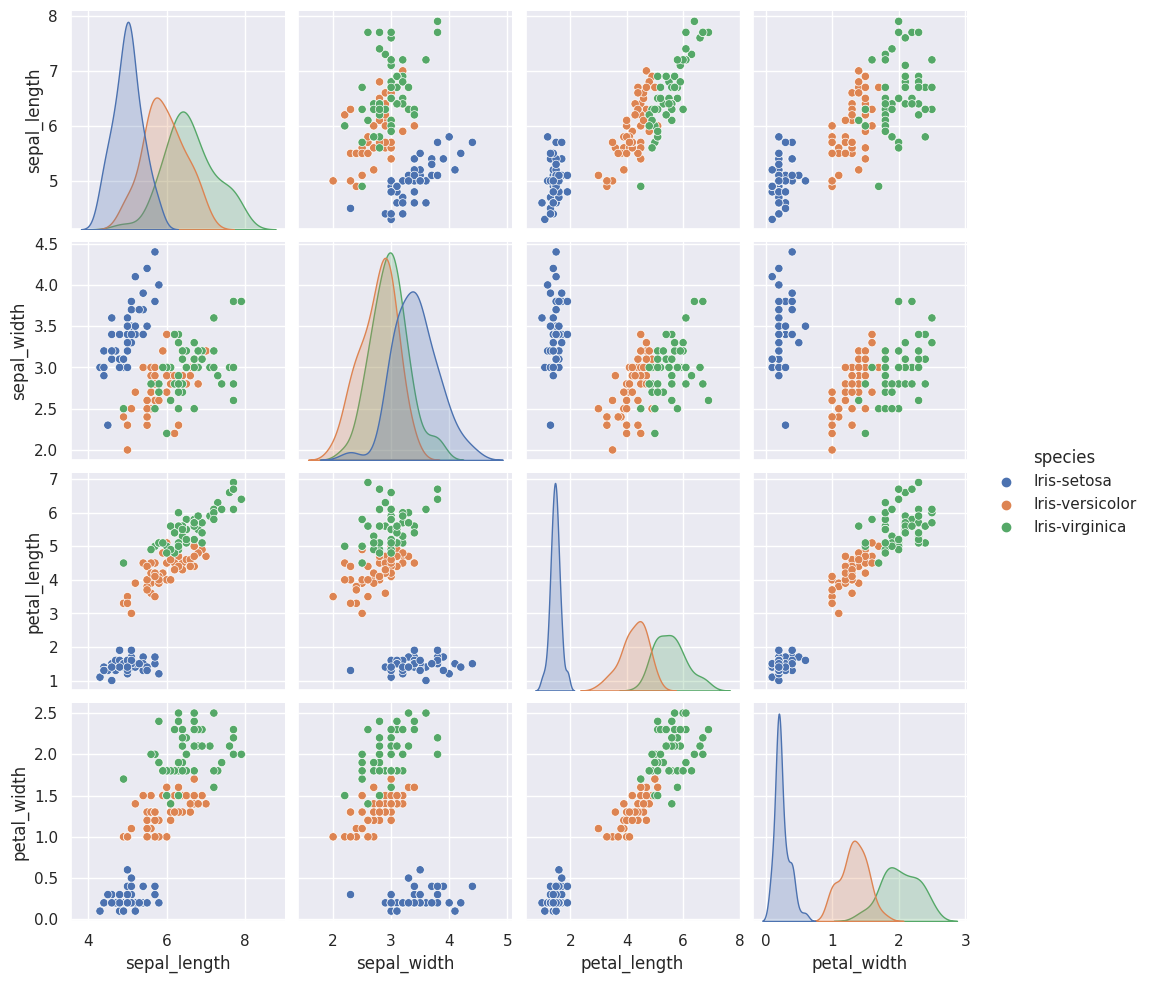

In [36]:
#pairplot - to visualize the relationships between different pairs of features
sns.set(style="darkgrid")
sns.pairplot(df, hue="species")

<h3>Heat Map</h3>

<Axes: >

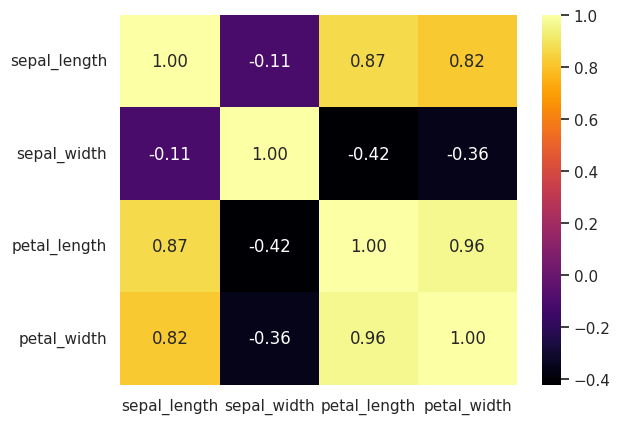

In [42]:
#correlation Heatmap: -Visualize correlation between features
corr_matrix = X.corr()
sns.heatmap(corr_matrix,annot=True,cmap='inferno',fmt='.2f')

<h3>Boxplot</h3>

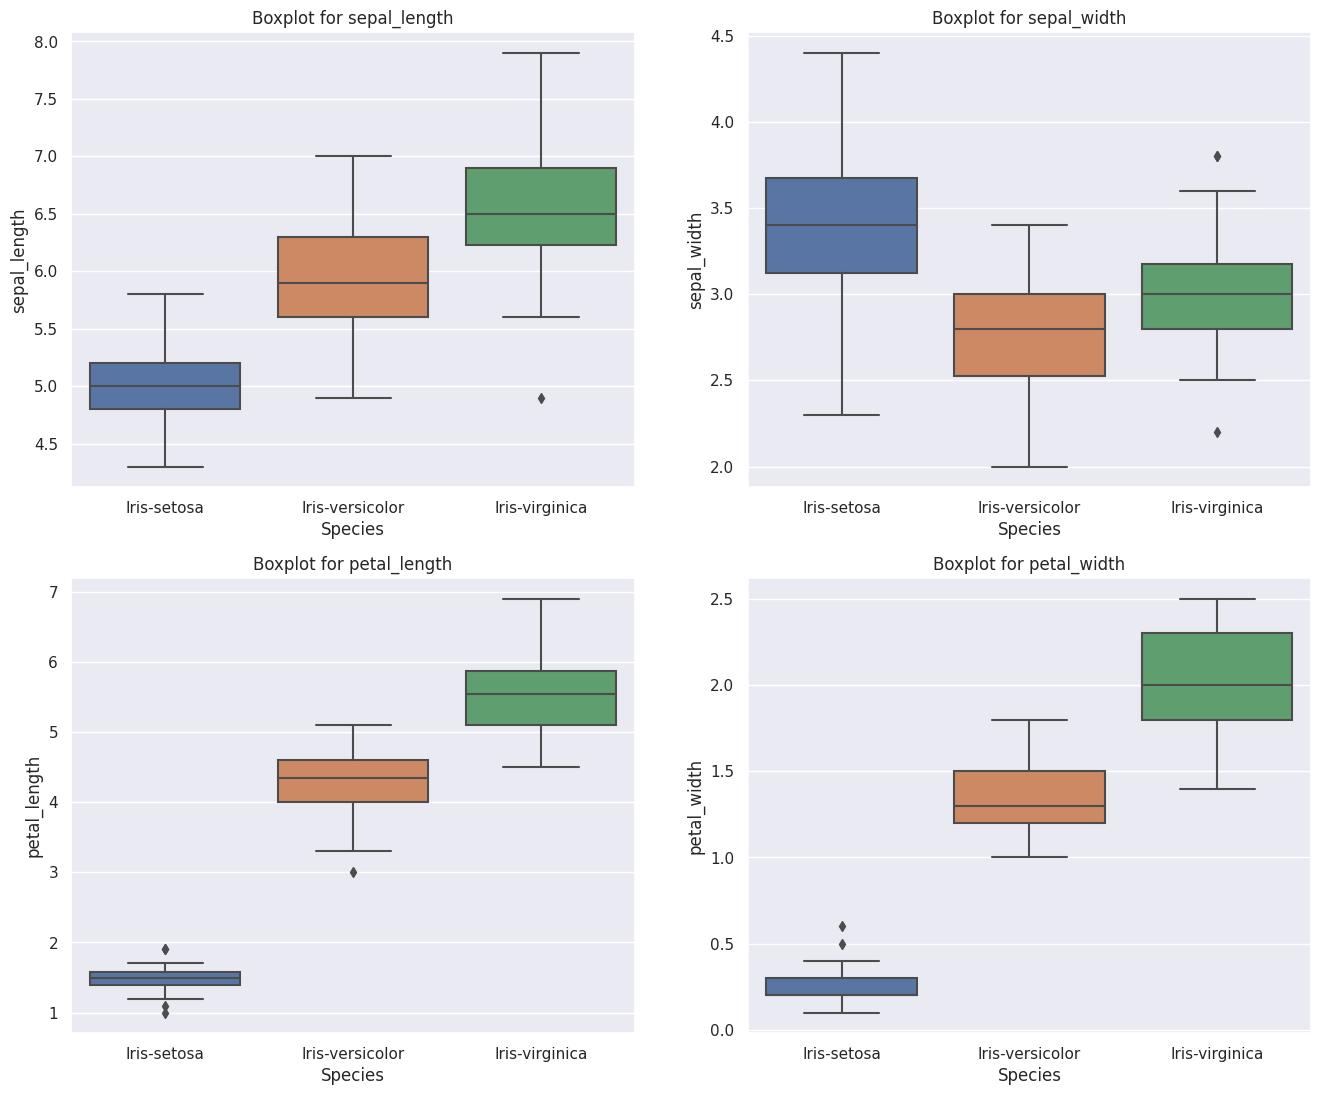

In [63]:
#Boxplots: Visualizes distribution of data and highlights outliers
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,13))
axes=axes.flatten()
for i,col in enumerate(X.columns):
    sns.boxplot(x='species',y=col,data=df,ax=axes[i])
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel('Species')
    axes[i].set_ylabel(col)

<h3>Violin Plot</h3>

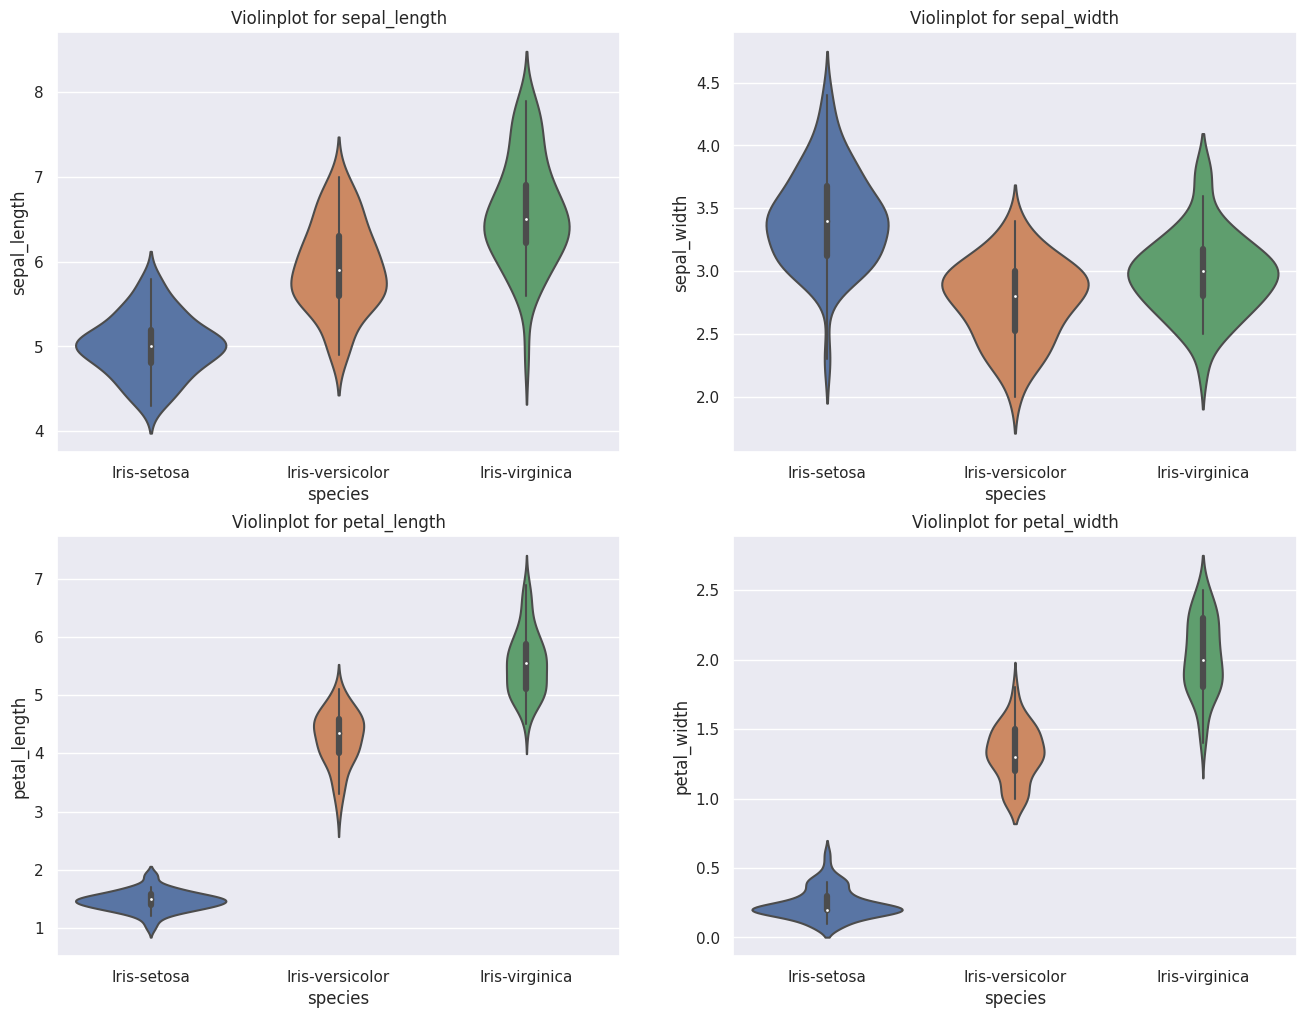

In [64]:
#Violin Plot: Similar to box plot with a deeper visualization
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(16,12))
axes=axes.flatten()
for i,col in enumerate(X.columns):
    sns.violinplot(x='species',y=col,data=df,ax=axes[i])
    axes[i].set_title(f'Violinplot for {col}')

In [65]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

<h3> Scatter Plot</h3>

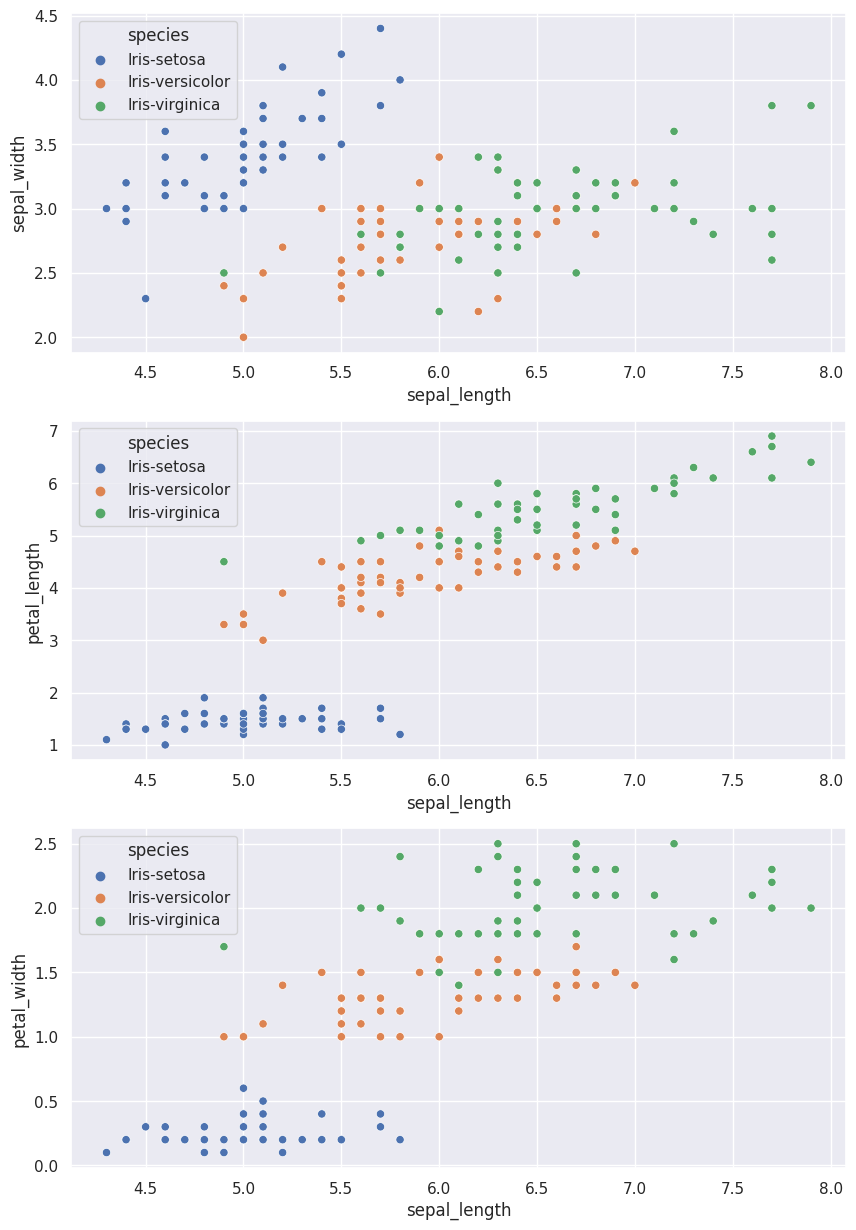

In [75]:
#Scatter plot - Visualize relationship between 2 features
scatter_list=df[['sepal_width', 'petal_length', 'petal_width']]
fig,axes = plt.subplots(nrows=3,ncols=1,figsize=(10,15))
axes=axes.flatten()
for i,col in enumerate(scatter_list):
    sns.scatterplot(x='sepal_length',y=col,data=df,hue='species',ax=axes[i])

<h3> Train - Test - Split</h3>

In [76]:
#Train - test - split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

<h3>Normalization</h3>

In [79]:
#Standard Scaler - helps in gradient descent, makes easy to interpret model coefficients
scaler = StandardScaler()

In [80]:
# Scale the independant variables - in both training and testing data
scaled_train = scaler.fit_transform(X_train)
scaled_test = scaler.fit_transform(X_test)

<h2><b>Models : </b></h2><br>
<ul><h3>Logistic Regression</h3>

In [82]:
#Logistic Regression
#train model
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(scaled_train,y_train)
logistic_regression_predictions = logistic_regression_model.predict(scaled_test)

<h3>Evaluation Metrics</h3>

In [88]:
#Evaluate
# 1.Logistic Regression
logistic_regression_accuracy = accuracy_score(y_test,logistic_regression_predictions)
logistic_regression_conf_matrix = confusion_matrix(y_test,logistic_regression_predictions)
logistic_regression_classification_rep = classification_report(y_test,logistic_regression_predictions)
print(f"Accuracy: {logistic_regression_accuracy}")
print("\nConfusion Matrix:")
print(logistic_regression_conf_matrix)
print("\nClassification Report:")
print(logistic_regression_classification_rep)

Accuracy: 0.9736842105263158

Confusion Matrix:
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

